# STEP 1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score)

# STEP 2: LOAD DATASET

In [ ]:
# Load Iris dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print(f"Dataset loaded: {df.shape}")
print(f"Samples: {len(df)}")
print(f"Features: {len(iris.feature_names)}")
print(f"Classes: {len(iris.target_names)}")

Dataset loaded: (150, 6)
Samples: 150
Features: 4
Classes: 3


# STEP 3: BASIC EDA

In [ ]:
print("--- Dataset Summary ---")
print(df.head())

print(f"\nTarget Distribution (Balanced):")
print(df['species_name'].value_counts())

print(f"\nMissing Values: {df.isnull().sum().sum()} (None!)")

--- Dataset Summary ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       Setosa  
1        0       Setosa  
2        0       Setosa  
3        0       Setosa  
4        0       Setosa  

Target Distribution (Balanced):
species_name
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Missing Values: 0 (None!)


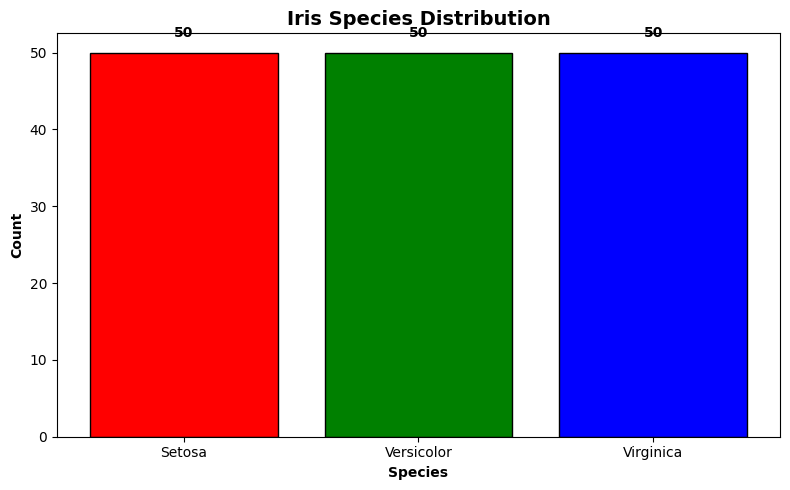

In [ ]:
# Quick visualization
plt.figure(figsize=(8, 5))
species_counts = df['species_name'].value_counts()
plt.bar(species_counts.index, species_counts.values,
        color=['red', 'green', 'blue'], edgecolor='black')
plt.title('Iris Species Distribution', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Species', fontweight='bold')
for i, v in enumerate(species_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


# STEP 4: PREPARE DATA

In [ ]:
X = df[iris.feature_names]
y = df['species']

print(f"Features: {list(X.columns)}")
print(f"Target: species (0=Setosa, 1=Versicolor, 2=Virginica)")
print(f"Shape: {X.shape}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: species (0=Setosa, 1=Versicolor, 2=Virginica)
Shape: (150, 4)


# STEP 5: TRAIN-TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")

Training samples: 120 (80.0%)
Testing samples: 30 (20.0%)
Features: 4


# STEP 6: FEATURE SCALING (CRITICAL FOR KNN!)

In [ ]:
print("--- Before Scaling ---")
print(X_train.describe())

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for visualization
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n--- After Scaling (StandardScaler: mean=0, std=1) ---")
print(X_train_scaled.describe())

print("\n✅ Features scaled successfully!")
print("   All features now have mean ≈ 0 and std ≈ 1")

--- Before Scaling ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         120.000000        120.000000          120.00000   
mean            5.841667          3.048333            3.77000   
std             0.840926          0.448524            1.76852   
min             4.300000          2.000000            1.10000   
25%             5.100000          2.800000            1.60000   
50%             5.750000          3.000000            4.25000   
75%             6.400000          3.325000            5.10000   
max             7.900000          4.400000            6.90000   

       petal width (cm)  
count        120.000000  
mean           1.205000  
std            0.762663  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

--- After Scaling (StandardScaler: mean=0, std=1) ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.200000e+02      1.20000

# STEP 7: FIND OPTIMAL K (ELBOW METHOD)


💡 K = Number of nearest neighbors to consider
   • Too small K (e.g., K=1): Overfitting (sensitive to noise)
   • Too large K (e.g., K=50): Underfitting (too smooth)
   • Optimal K: Balance between bias and variance
--- Testing K values from 1 to 30 ---


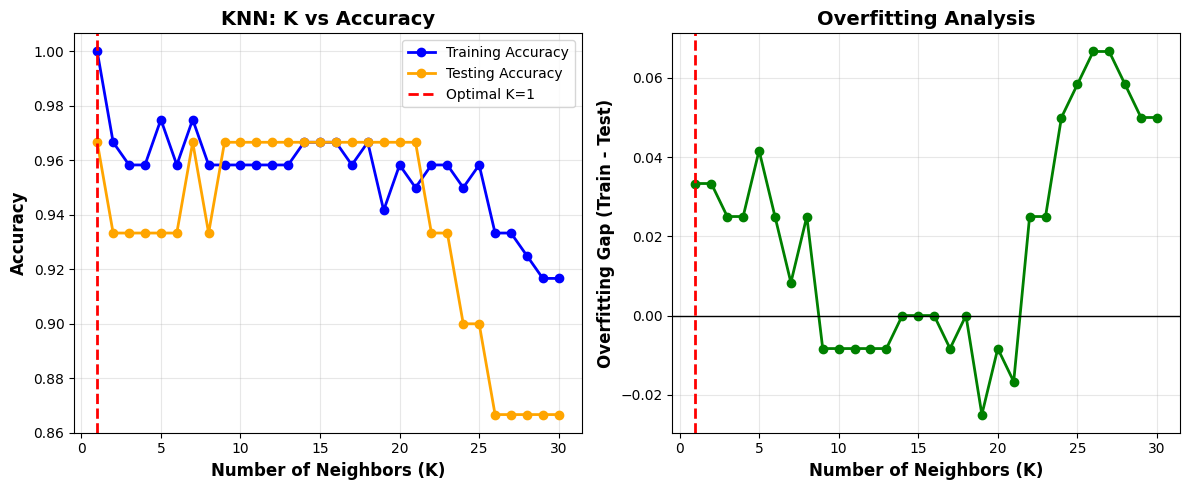


--- Elbow Method Results ---
✓ Optimal K: 1
✓ Test Accuracy at K=1: 0.9667
✓ Training Accuracy at K=1: 1.0000
✓ Overfitting Gap: 0.0333


In [ ]:
print("\n💡 K = Number of nearest neighbors to consider")
print("   • Too small K (e.g., K=1): Overfitting (sensitive to noise)")
print("   • Too large K (e.g., K=50): Underfitting (too smooth)")
print("   • Optimal K: Balance between bias and variance")

# Test different K values
k_values = range(1, 31)
train_scores = []
test_scores = []

print("--- Testing K values from 1 to 30 ---")

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Visualize elbow curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, train_scores, 'o-', label='Training Accuracy', linewidth=2, color='blue')
plt.plot(k_values, test_scores, 'o-', label='Testing Accuracy', linewidth=2, color='orange')
plt.xlabel('Number of Neighbors (K)', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('KNN: K vs Accuracy', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Find optimal K (highest test accuracy)
optimal_k = k_values[np.argmax(test_scores)]
max_test_acc = max(test_scores)

plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2,
            label=f'Optimal K={optimal_k}')
plt.legend()

# Plot 2: Overfitting gap
plt.subplot(1, 2, 2)
gap = [train - test for train, test in zip(train_scores, test_scores)]
plt.plot(k_values, gap, 'o-', linewidth=2, color='green')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2)
plt.xlabel('Number of Neighbors (K)', fontweight='bold', fontsize=12)
plt.ylabel('Overfitting Gap (Train - Test)', fontweight='bold', fontsize=12)
plt.title('Overfitting Analysis', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n--- Elbow Method Results ---")
print(f"✓ Optimal K: {optimal_k}")
print(f"✓ Test Accuracy at K={optimal_k}: {max_test_acc:.4f}")
print(f"✓ Training Accuracy at K={optimal_k}: {train_scores[optimal_k-1]:.4f}")
print(f"✓ Overfitting Gap: {train_scores[optimal_k-1] - max_test_acc:.4f}")


# STEP 8: TRAIN DEFAULT MODEL (K=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_default = KNeighborsClassifier(n_neighbors=5)
model_default.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Predictions
y_pred_default = model_default.predict(X_test_scaled)

In [ ]:
# Evaluation
acc_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default, average='weighted')

print("--- Default Model Performance (K=5) ---")
print(f"Accuracy: {acc_default:.4f} ({acc_default*100:.1f}%)")
print(f"F1-Score: {f1_default:.4f}")

--- Default Model Performance (K=5) ---
Accuracy: 0.9333 (93.3%)
F1-Score: 0.9327


In [ ]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_default,
                            target_names=iris.target_names))


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



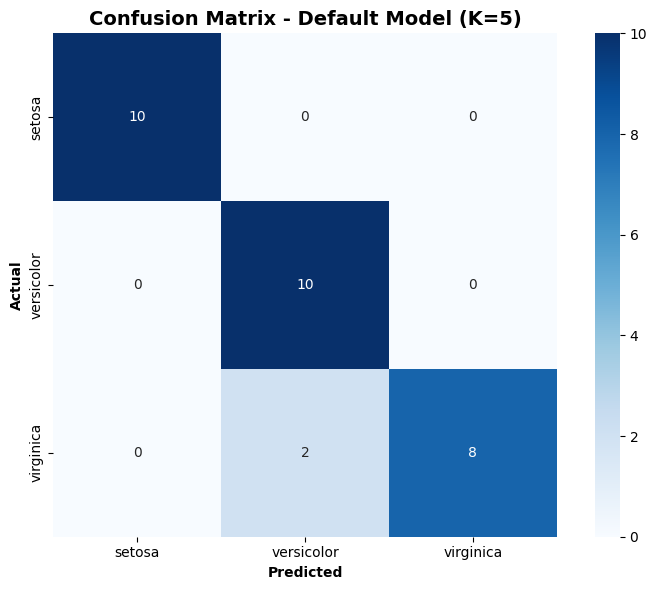

In [ ]:
# Confusion Matrix
cm_default = confusion_matrix(y_test, y_pred_default)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names,
           cbar=True, square=True)
plt.title('Confusion Matrix - Default Model (K=5)', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show()

# STEP 9: TRAIN OPTIMAL MODEL (Best K from Elbow Method)


In [ ]:
model_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
model_optimal.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Predictions
y_pred_optimal = model_optimal.predict(X_test_scaled)

In [ ]:
# Evaluation
acc_optimal = accuracy_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal, average='weighted')

print(f"--- Optimal Model Performance (K={optimal_k}) ---")
print(f"Accuracy: {acc_optimal:.4f} ({acc_optimal*100:.1f}%)")
print(f"F1-Score: {f1_optimal:.4f}")

print(f"\nImprovement over default: {(acc_optimal - acc_default)*100:+.2f}%")

--- Optimal Model Performance (K=1) ---
Accuracy: 0.9667 (96.7%)
F1-Score: 0.9666

Improvement over default: +3.33%


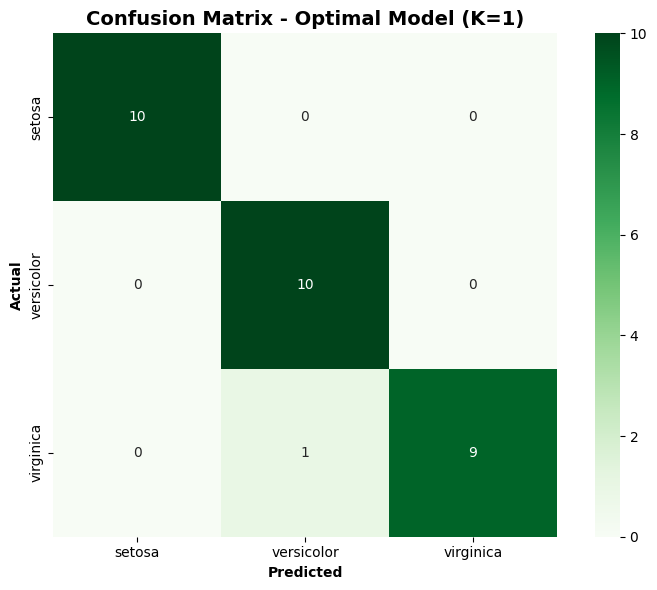

In [ ]:
# Confusion Matrix
cm_optimal = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Greens',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names,
           cbar=True, square=True)
plt.title(f'Confusion Matrix - Optimal Model (K={optimal_k})', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show()

# STEP 10: CROSS-VALIDATION

In [ ]:
cv_scores = cross_val_score(model_optimal, X_train_scaled, y_train,
                             cv=5, scoring='accuracy', n_jobs=-1)

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print(f"\n--- Comparison ---")
print(f"CV Accuracy (5-fold): {cv_scores.mean():.4f}")
print(f"Test Accuracy:        {acc_optimal:.4f}")
print(f"Difference:           {abs(cv_scores.mean() - acc_optimal):.4f}")

if abs(cv_scores.mean() - acc_optimal) < 0.05:
    print("\n✅ Model generalizes well!")
else:
    print("\n⚠️ Large gap - possible overfitting")

CV Accuracy Scores: [0.91666667 0.95833333 0.875      0.95833333 1.        ]
Mean CV Accuracy: 0.9417 (+/- 0.0425)

--- Comparison ---
CV Accuracy (5-fold): 0.9417
Test Accuracy:        0.9667
Difference:           0.0250

✅ Model generalizes well!


# STEP 11: HYPERPARAMETER TUNING (GridSearchCV)

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

print("Running GridSearchCV...")
print("Expected time: 10-20 seconds...")

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("\n--- Best Hyperparameters Found ---")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

Running GridSearchCV...
Expected time: 10-20 seconds...
Fitting 5 folds for each of 42 candidates, totalling 210 fits

--- Best Hyperparameters Found ---
metric: euclidean
n_neighbors: 5
weights: uniform
Best CV Accuracy: 0.9667


In [ ]:
# Predict with tuned model
y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaled)

In [ ]:
acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("--- Tuned Model Performance ---")
print(f"Accuracy: {acc_tuned:.4f} ({acc_tuned*100:.1f}%)")
print(f"F1-Score: {f1_tuned:.4f}")

print(f"\nImprovement over default: {(acc_tuned - acc_default)*100:+.2f}%")

--- Tuned Model Performance ---
Accuracy: 0.9333 (93.3%)
F1-Score: 0.9327

Improvement over default: +0.00%


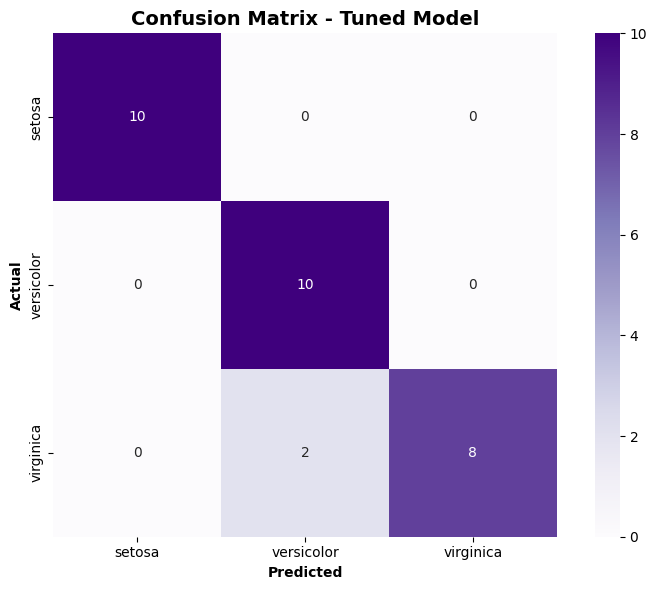

In [ ]:
# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Purples',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names,
           cbar=True, square=True)
plt.title('Confusion Matrix - Tuned Model', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show()

# STEP 12: DISTANCE METRICS COMPARISON

Euclidean   : 0.9667
Manhattan   : 0.9667
Minkowski   : 0.9667


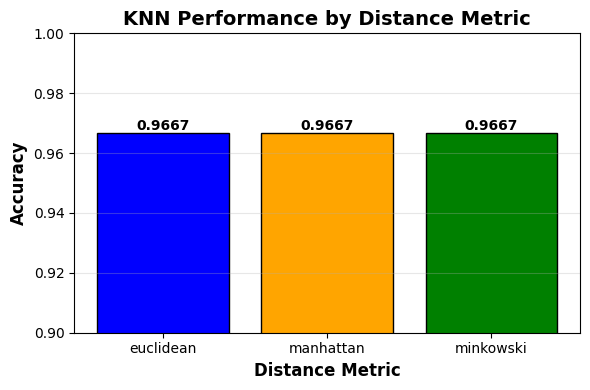


Best distance metric: euclidean (0.9667)


In [ ]:
metrics = ['euclidean', 'manhattan', 'minkowski']
metric_scores = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    metric_scores.append(score)
    print(f"{metric.capitalize():12s}: {score:.4f}")

# Visualize
plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, metric_scores, color=['blue', 'orange', 'green'],
               edgecolor='black')
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.xlabel('Distance Metric', fontweight='bold', fontsize=12)
plt.title('KNN Performance by Distance Metric', fontweight='bold', fontsize=14)
plt.ylim([0.90, 1.0])
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

best_metric = metrics[np.argmax(metric_scores)]
print(f"\nBest distance metric: {best_metric} ({max(metric_scores):.4f})")

# STEP 13: MODEL COMPARISON

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Default (K=5)', f'Optimal (K={optimal_k})', 'Tuned (GridSearch)'],
    'Accuracy': [acc_default, acc_optimal, acc_tuned],
    'F1-Score': [f1_default, f1_optimal, f1_tuned],
    'K Value': [5, optimal_k, grid_search.best_params_['n_neighbors']]
})

print(comparison.to_string(index=False))

best_idx = comparison['Accuracy'].idxmax()
print(f"\nBest Model: {comparison.loc[best_idx, 'Model']}")
print(f"Best Accuracy: {comparison.loc[best_idx, 'Accuracy']:.4f}")

             Model  Accuracy  F1-Score  K Value
     Default (K=5)  0.933333  0.932660        5
     Optimal (K=1)  0.966667  0.966583        1
Tuned (GridSearch)  0.933333  0.932660        5

Best Model: Optimal (K=1)
Best Accuracy: 0.9667
